In [1]:
# Import all the necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
plt.rc("font", size=13)
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, random_split, DataLoader

# import xgboost as xgb
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the train data set
data_train = pd.read_csv("data/bank_data.csv", header=0)
# data_train

In [3]:
# Check the shape of train data
data_train.shape

(100514, 19)

In [4]:
# Check the number of columns in my dataset
data_train.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

## Exploratory data analysis

In [8]:
data_train.describe().T 

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,100000.0,1.176045e+07,3.178394e+07,10802.0,179652.0000,312246.0,5.249420e+05,1.000000e+08
Credit Score,80846.0,1.076456e+03,1.475404e+03,585.0,705.0000,724.0,7.410000e+02,7.510000e+03
Annual Income,80846.0,1.378277e+06,1.081360e+06,76627.0,848844.0000,1174162.0,1.650663e+06,1.655574e+08
Monthly Debt,100000.0,1.847241e+04,1.217499e+04,0.0,10214.1625,16220.3,2.401206e+04,4.358433e+05
Years of Credit History,100000.0,1.819914e+01,7.015324e+00,3.6,13.5000,16.9,2.170000e+01,7.050000e+01
Months since last delinquent,46859.0,3.490132e+01,2.199783e+01,0.0,16.0000,32.0,5.100000e+01,1.760000e+02
Number of Open Accounts,100000.0,1.112853e+01,5.009870e+00,0.0,8.0000,10.0,1.400000e+01,7.600000e+01
Number of Credit Problems,100000.0,1.683100e-01,4.827050e-01,0.0,0.0000,0.0,0.000000e+00,1.500000e+01
Current Credit Balance,100000.0,2.946374e+05,3.761709e+05,0.0,112670.0000,209817.0,3.679588e+05,3.287897e+07
Maximum Open Credit,99998.0,7.607984e+05,8.384503e+06,0.0,273438.0000,467874.0,7.829580e+05,1.539738e+09


In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [5]:
# Number of unique ids
unique_loan = len(data_train["Loan ID"].unique())
unique_customer = len(data_train["Customer ID"].unique())

print(f"Number of unique loan ID:", unique_loan)
print(f"Number of unique cusomer ID:", unique_customer)

Number of unique loan ID: 82000
Number of unique cusomer ID: 82000


In [6]:
# Function to loop through every column and save the values into a dataframe
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []

def col_1(df_1):
    for column_name in df_1.columns:
        col1.append(column_name)
        col2.append(df_1[column_name].nunique())
        col3.append(df_1[column_name].isnull().any())
        col4.append(df_1[column_name].duplicated().any())
        col5.append(df_1[column_name].value_counts())

        # print("---> Number of unique values : {}".format(df_1[column_name].nunique()))
        # print("---> Null values present inside : {}".format(df_1[column_name].isnull().any()))
        # print("---> Are there any duplicated values : {}".format(df_1[column_name].duplicated().any()))
        # print("---> How many value counts : {}".format(df_1[column_name].value_counts()))
        # print("                                                                                         ")

col_1(data_train)

Table_info = pd.DataFrame({'column_name': col1, 'unique_values': col2, 
'any_null_values': col3, 'any_duplicates': col4, 'values_counts': col5})

Table_info  

,column_name,unique_values,any_null_values,any_duplicates,values_counts
0,Loan ID,81999,True,True,Loan ID 14dd8831-6af5-400b-83ec-68e61888a048 ...
1,Customer ID,81999,True,True,Customer ID 981165ec-3274-42f5-a3b4-d104041a9c...
2,Loan Status,2,True,True,Loan Status Fully Paid 77361 Charged Off ...
3,Current Loan Amount,22004,True,True,Current Loan Amount 99999999.0 11484 223102...
4,Term,2,True,True,Term Short Term 72208 Long Term 27792 N...
5,Credit Score,324,True,True,Credit Score 747.0 1825 740.0 1746 746...
6,Annual Income,36174,True,True,Annual Income 1162572.0 22 973370.0 19 ...
7,Years in current job,11,True,True,Years in current job 10+ years 31121 2 year...
8,Home Ownership,4,True,True,Home Ownership Home Mortgage 48410 Rent ...
9,Purpose,16,True,True,Purpose Debt Consolidation 78552 other ...


In [7]:
# Function to calculate null values and their percentage
def calculate_null_values(dataframe):
    d_frame = dataframe
    # get the sum of the null value of  each column 
    d_frame_null_values = pd.DataFrame(dataframe.isna().sum())
    # reset the dataframe index
    d_frame_null_values.reset_index(inplace=True)
    # add colume header to the dataframe
    d_frame_null_values.columns = ['Field_names', 'Null_value']
    #calculate the percentage of null or missing values 
    d_frame_null_value_percentage = dataframe.isnull().sum() / len(dataframe) * 100
    d_frame_null_value_percentage = pd.DataFrame(d_frame_null_value_percentage)
    d_frame_null_value_percentage.reset_index(inplace=True)
    d_frame_null_value_percentage = pd.DataFrame(d_frame_null_value_percentage)
    d_frame_null_values['Null_values_percentage'] = d_frame_null_value_percentage[0]
    return d_frame_null_values


calculate_null_values(data_train)

,Field_names,Null_value,Null_values_percentage
0,Loan ID,514,0.511372
1,Customer ID,514,0.511372
2,Loan Status,514,0.511372
3,Current Loan Amount,514,0.511372
4,Term,514,0.511372
5,Credit Score,19668,19.567423
6,Annual Income,19668,19.567423
7,Years in current job,4736,4.711781
8,Home Ownership,514,0.511372
9,Purpose,514,0.511372


## Feature Engineering

In [8]:
# about 50 % of data is missing 
data_train.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [9]:
# All the last rows of all columns has null values so we can drop them
data_train[data_train['Years of Credit History'].isnull() == True]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Dropping the last rows in the dataset
data_train.drop(data_train.tail(514).index, inplace=True) # drop last 514 rows
calculate_null_values(data_train)

,Field_names,Null_value,Null_values_percentage
0,Loan ID,0,0.000
1,Customer ID,0,0.000
2,Loan Status,0,0.000
3,Current Loan Amount,0,0.000
4,Term,0,0.000
5,Credit Score,19154,19.154
6,Annual Income,19154,19.154
7,Years in current job,4222,4.222
8,Home Ownership,0,0.000
9,Purpose,0,0.000


In [11]:
for i in data_train['Maximum Open Credit'][data_train['Maximum Open Credit'].isnull() == True].index:
    data_train.drop(labels=i, inplace=True)


In [12]:
for i in data_train['Bankruptcies'][data_train['Bankruptcies'].isnull() == True].index:
    data_train.drop(labels=i, inplace=True)

In [13]:
for i in data_train['Tax Liens'][data_train['Tax Liens'].isnull() == True].index:
    data_train.drop(labels=i, inplace=True)

calculate_null_values(data_train)

,Field_names,Null_value,Null_values_percentage
0,Loan ID,0,0.000000
1,Customer ID,0,0.000000
2,Loan Status,0,0.000000
3,Current Loan Amount,0,0.000000
4,Term,0,0.000000
5,Credit Score,19111,19.150450
6,Annual Income,19111,19.150450
7,Years in current job,4222,4.230715
8,Home Ownership,0,0.000000
9,Purpose,0,0.000000


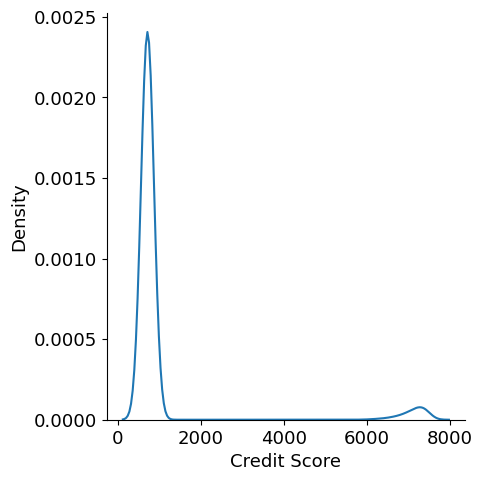

In [14]:

sns.displot(data = data_train , x = "Credit Score" ,  kind="kde",)

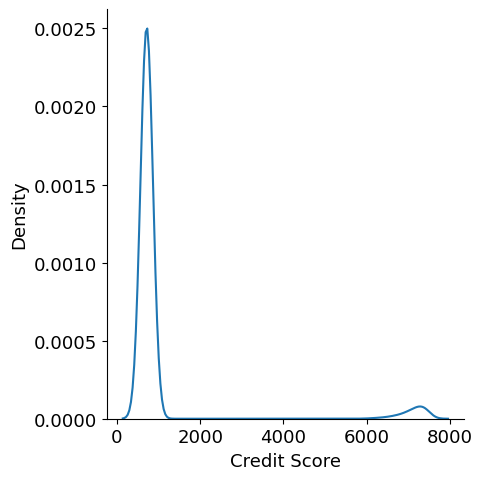

In [15]:
# Fill null values for Credit score
fill_list = data_train['Credit Score'].dropna()
data_train['Credit Score'] = data_train['Credit Score'].fillna(pd.Series(np.random.choice(fill_list , size = len(data_train.index))))
data_train.dropna(axis = 0, subset = ['Credit Score'], inplace = True)
sns.displot(data = data_train , x = "Credit Score" ,  kind="kde",)

<Axes: xlabel='Annual Income', ylabel='Density'>

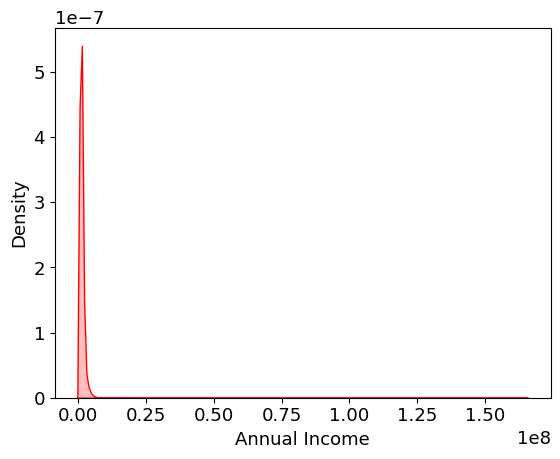

In [16]:
sns.kdeplot(data_train['Annual Income'],
                color="Red", shade = True)

<Axes: xlabel='Annual Income', ylabel='Density'>

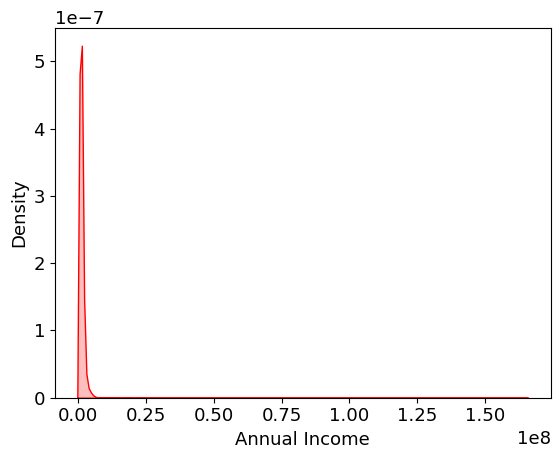

In [17]:
# Fill null values for Annual Income
fill_list = data_train['Annual Income'].dropna()
data_train['Annual Income'] = data_train['Annual Income'].fillna(pd.Series(np.random.choice(fill_list , size = len(data_train.index))))
data_train.dropna(axis = 0, subset = ['Annual Income'], inplace = True)
sns.kdeplot(data_train['Annual Income'],
                color="Red", shade = True)

<Axes: xlabel='count', ylabel='Years in current job'>

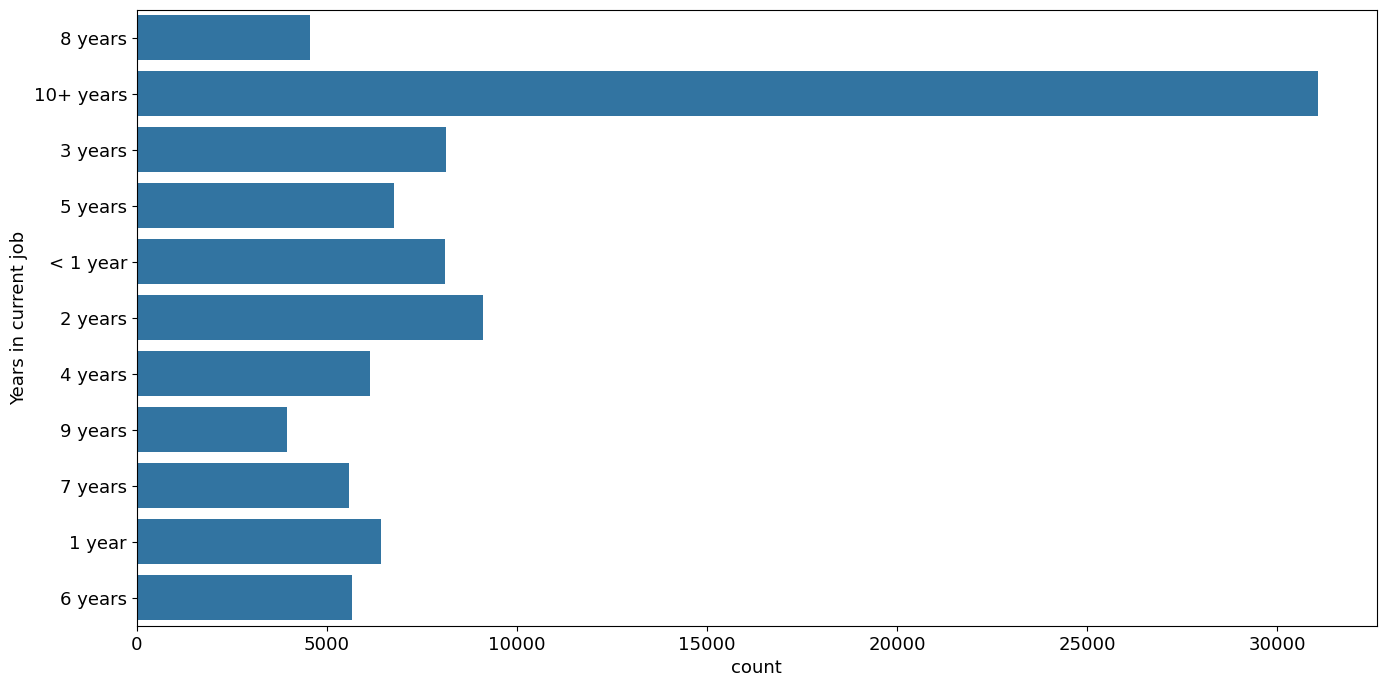

In [18]:
plt.figure(figsize=(16,8))

sns.countplot(data_train['Years in current job'])

In [19]:
# fill null values for years in current job with '10+ years'
data_train['Years in current job'].fillna('10+ years', inplace=True) # fill with '10+ years'.
calculate_null_values(data_train)

,Field_names,Null_value,Null_values_percentage
0,Loan ID,0,0.0
1,Customer ID,0,0.0
2,Loan Status,0,0.0
3,Current Loan Amount,0,0.0
4,Term,0,0.0
5,Credit Score,0,0.0
6,Annual Income,0,0.0
7,Years in current job,0,0.0
8,Home Ownership,0,0.0
9,Purpose,0,0.0


<Axes: >

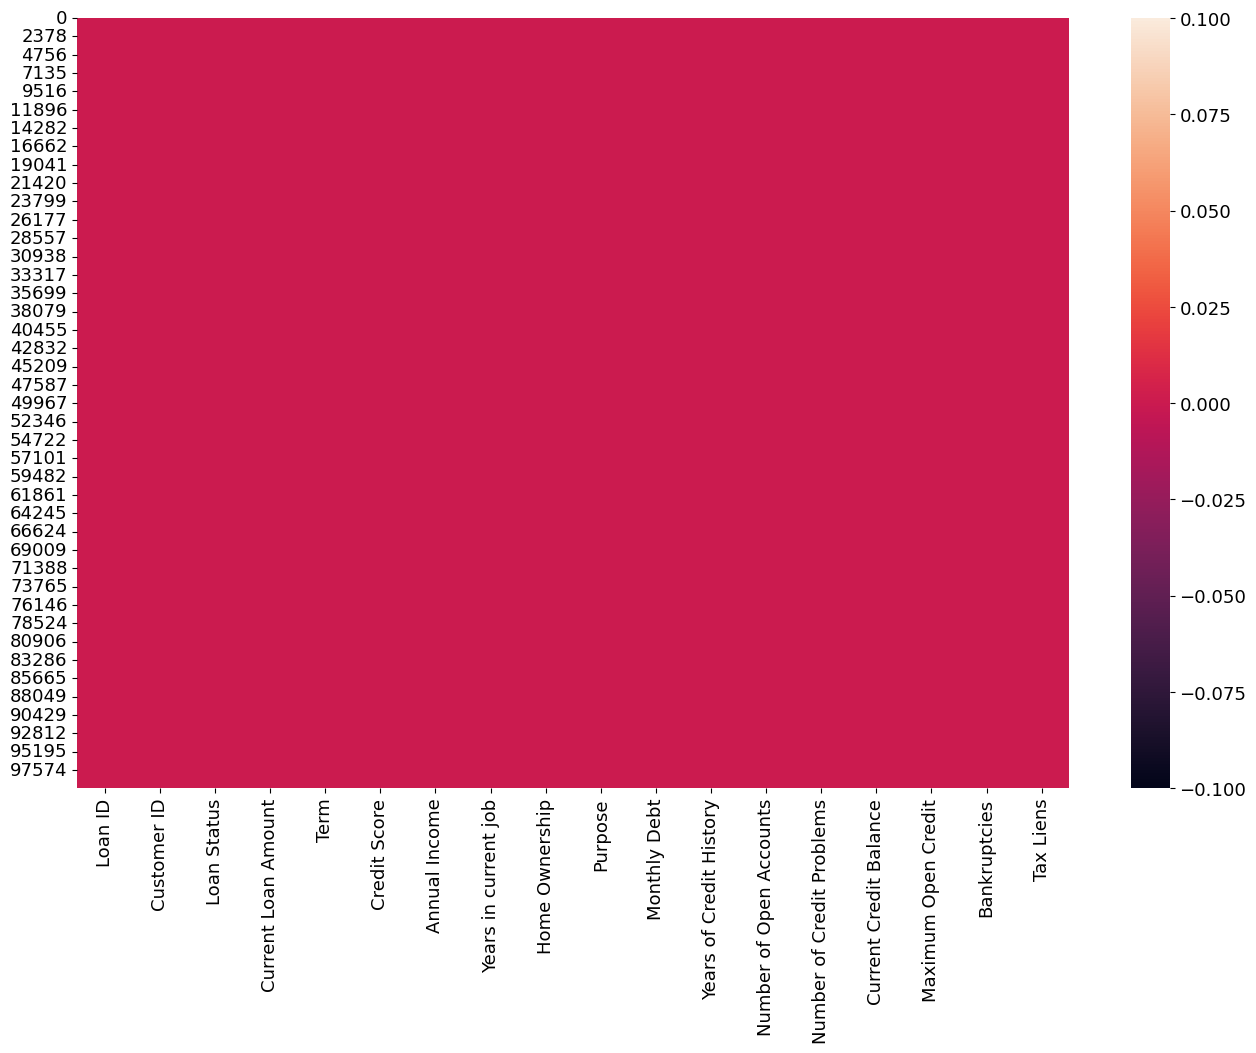

In [25]:
# There are no null values now
plt.figure(figsize=(16,10))
sns.heatmap(data_train.isnull())

In [26]:
data_train.shape

(99745, 18)

In [27]:
data_train["Loan Status"].value_counts()

Loan Status
Fully Paid     77175
Charged Off    22570
Name: count, dtype: int64

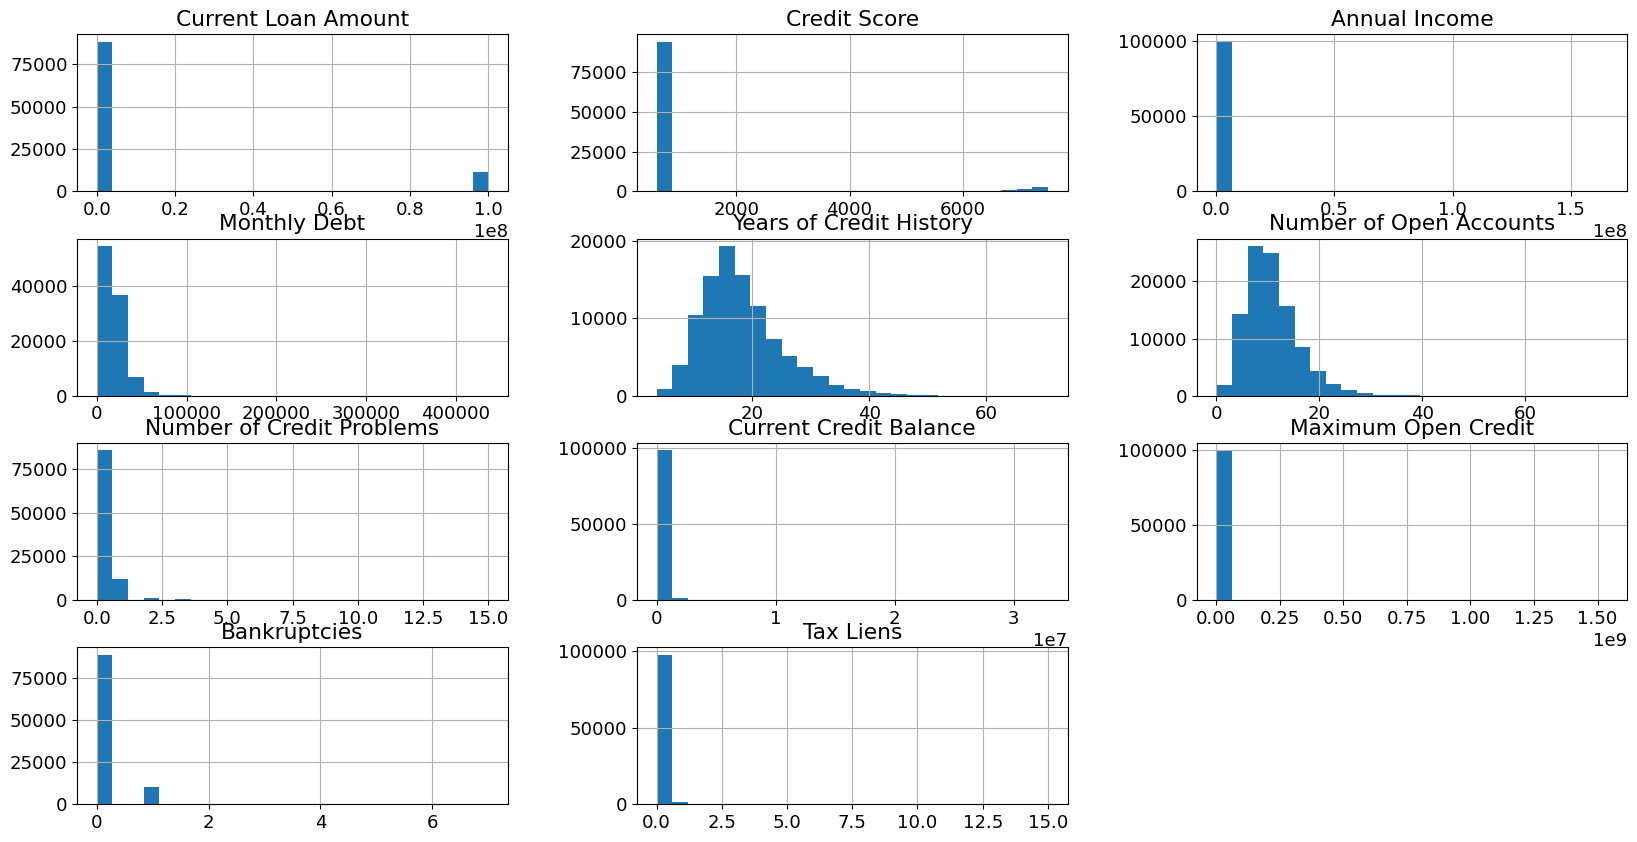

In [28]:
data_train.hist(bins=25,figsize=(20,10));

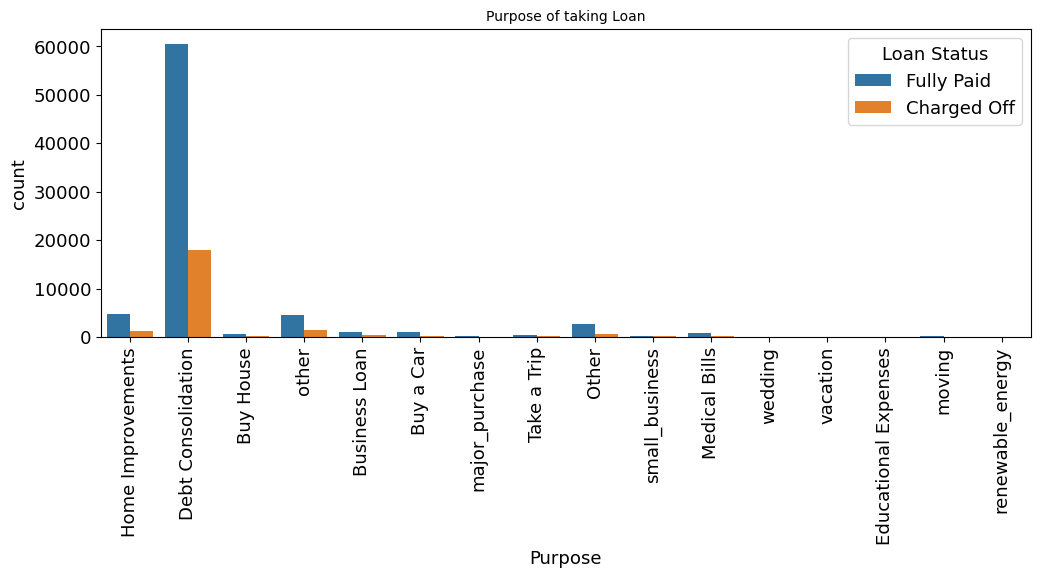

In [29]:
plt.figure(figsize=(12,4))
sns.countplot(x='Purpose',data=data_train,hue='Loan Status')
plt.xticks(rotation=90)
plt.title('Purpose of taking Loan',fontdict={'fontsize':10})
plt.show()

In [20]:
# Check for duplicate rows based on loan_id and customer_id
duplicate_loan_ids = data_train[data_train.duplicated(['Loan ID'], keep=False)]
duplicate_customer_ids = data_train[data_train.duplicated(['Customer ID'], keep=False)]

# Print the duplicate rows for loan_id and customer_id
print(f"Duplicate Rows based on loan_id:", duplicate_loan_ids)
print(f"Duplicate Rows based on customer_id:", duplicate_customer_ids)


Duplicate Rows based on loan_id:                                     Loan ID  \
0      14dd8831-6af5-400b-83ec-68e61888a048   
3      77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
4      d4062e70-befa-4995-8643-a0de73938182   
8      8af915d9-9e91-44a0-b5a2-564a45c12089   
15     7cbaa3fa-16fd-4343-9bcb-e90b34a1072f   
...                                     ...   
99987  a4154f62-acf2-46b8-8a0e-e92ded2607d5   
99991  326d0f2b-015f-480e-90e9-9c0d7d307196   
99993  79b81158-5d55-4766-8ad6-ebcd683f7d59   
99994  8506a4e9-af7d-47d2-a1bf-7ea2c41858f0   
99995  3f94c18c-ba8f-45d0-8610-88a684a410a9   

                                Customer ID Loan Status  Current Loan Amount  \
0      981165ec-3274-42f5-a3b4-d104041a9ca9  Fully Paid             445412.0   
3      e777faab-98ae-45af-9a86-7ce5b33b1011  Fully Paid             347666.0   
4      81536ad9-5ccf-4eb8-befb-47a4d608658e  Fully Paid             176220.0   
8      af534dea-d27e-4fd6-9de8-efaa52a78ec0  Fully Paid             548746.0   
15

In [31]:
data_train.duplicated().sum()

10201

In [21]:
# Drop duplicated values
data_train.drop_duplicates(inplace=True)
data_train.shape

(89544, 18)

In [22]:
# Drop Loan id and customer id because we do nt need them for now
data_train = data_train.drop(labels=['Loan ID', 'Customer ID'], axis=1)
data_train.shape

(89544, 16)

In [23]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

v_counts(data_train)

Loan Status
Fully Paid     66974
Charged Off    22570
Name: count, dtype: int64
_____________________________________________________________________________
Current Loan Amount
99999999.0    11457
223652.0         24
216194.0         24
223322.0         24
223102.0         23
              ...  
425040.0          1
410564.0          1
279268.0          1
720522.0          1
274076.0          1
Name: count, Length: 21988, dtype: int64
_____________________________________________________________________________
Term
Short Term    65793
Long Term     23751
Name: count, dtype: int64
_____________________________________________________________________________
Credit Score
747.0     2260
746.0     2189
740.0     2137
741.0     2129
742.0     2115
          ... 
6070.0       1
5920.0       1
5900.0       1
5860.0       1
6050.0       1
Name: count, Length: 324, dtype: int64
_____________________________________________________________________________
Annual Income
1162572.0    26
1140000.0

In [24]:
# In purpose column there are two same categories with different names 'other' & 'Other', so combining them both
data_train.Purpose = data_train.Purpose.str.replace('other','Other')
data_train.Purpose.value_counts()

Purpose
Debt Consolidation      70686
Other                    8079
Home Improvements        5223
Business Loan            1351
Buy a Car                1160
Medical Bills             980
Buy House                 582
Take a Trip               486
major_purchase            329
small_business            249
moving                    135
wedding                   102
vacation                   89
Educational Expenses       85
renewable_energy            8
Name: count, dtype: int64

In [36]:
# Converting all categorical values to numerical columns
l_encoder = LabelEncoder()

data_train['Loan Status'] = l_encoder.fit_transform(data_train['Loan Status'])
data_train['Term'] = l_encoder.fit_transform(data_train['Term'])
data_train['Years in current job'] = l_encoder.fit_transform(data_train['Years in current job'])
data_train['Home Ownership'] = l_encoder.fit_transform(data_train['Home Ownership'])
data_train['Purpose'] = l_encoder.fit_transform(data_train['Purpose'])

v_counts(data_train)

Loan Status
1    66974
0    22570
Name: count, dtype: int64
_____________________________________________________________________________
Current Loan Amount
99999999.0    11457
223652.0         24
216194.0         24
223322.0         24
223102.0         23
              ...  
425040.0          1
410564.0          1
279268.0          1
720522.0          1
274076.0          1
Name: count, Length: 21988, dtype: int64
_____________________________________________________________________________
Term
1    65793
0    23751
Name: count, dtype: int64
_____________________________________________________________________________
Credit Score
747.0     2238
740.0     2188
746.0     2141
742.0     2139
741.0     2137
          ... 
5920.0       1
5900.0       1
6010.0       1
5960.0       1
6050.0       1
Name: count, Length: 324, dtype: int64
_____________________________________________________________________________
Annual Income
1162572.0    29
1356068.0    21
1166220.0    20
973370.0     20

Current Credit Balance
0.0          513
137807.0      15
175978.0      15
106039.0      14
148846.0      14
            ... 
1232739.0      1
778601.0       1
634885.0       1
4662790.0      1
850820.0       1
Name: count, Length: 32688, dtype: int64
_____________________________________________________________________________
Maximum Open Credit
0.0          616
237204.0      11
150194.0      11
236412.0      10
376992.0      10
            ... 
812108.0       1
833030.0       1
783772.0       1
3107148.0      1
2299198.0      1
Name: count, Length: 44525, dtype: int64
_____________________________________________________________________________
Bankruptcies
0.0    79835
1.0     9227
2.0      369
3.0       82
4.0       24
5.0        5
7.0        1
6.0        1
Name: count, dtype: int64
_____________________________________________________________________________
Tax Liens
0.0     87859
1.0      1173
2.0       323
3.0       100
4.0        52
5.0        15
6.0        10
7.0         6
9.

In [37]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89544 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                89544 non-null  int64  
 1   Current Loan Amount        89544 non-null  float64
 2   Term                       89544 non-null  int64  
 3   Credit Score               89544 non-null  float64
 4   Annual Income              89544 non-null  float64
 5   Years in current job       89544 non-null  int64  
 6   Home Ownership             89544 non-null  int64  
 7   Purpose                    89544 non-null  int64  
 8   Monthly Debt               89544 non-null  float64
 9   Years of Credit History    89544 non-null  float64
 10  Number of Open Accounts    89544 non-null  float64
 11  Number of Credit Problems  89544 non-null  float64
 12  Current Credit Balance     89544 non-null  float64
 13  Maximum Open Credit        89544 non-null  float64


## Data Splitting

In [25]:
# Splitting the dataset

x= data_train.drop(['Loan Status'] , axis=1).values
y = data_train['Loan Status'].values

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.25 , random_state= 3)

print(x_train.shape , x_test.shape)

(67158, 15) (22386, 15)


## Export

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,748.0,2433748.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,715.0,935560.0,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72770,Fully Paid,561616.0,Long Term,741.0,1213758.0,2 years,Own Home,Buy House,17801.67,14.6,13.0,0.0,62415.0,662948.0,0.0,0.0
72772,Charged Off,446336.0,Long Term,661.0,1888809.0,10+ years,Rent,Debt Consolidation,44859.38,20.5,26.0,0.0,548359.0,967890.0,0.0,0.0
72773,Charged Off,778316.0,Long Term,673.0,1824494.0,5 years,Home Mortgage,Debt Consolidation,32384.74,12.8,17.0,0.0,910233.0,1104774.0,0.0,0.0
72774,Fully Paid,99999999.0,Short Term,708.0,2791100.0,7 years,Home Mortgage,Debt Consolidation,72335.85,21.4,12.0,0.0,1285407.0,1853500.0,0.0,0.0


In [31]:
full_df = data_train.copy()
df_train = full_df.iloc[:x_train.shape[0]]
df_test = full_df.iloc[-x_test.shape[0]:]

df_train.to_csv("data/processed/df_train.csv", index=False)
df_test.to_csv("data/processed/df_test.csv", index=False)

In [45]:
np.save("data/processed/x_train.npy", x_train)
np.save("data/processed/x_test.npy", x_test)
np.save("data/processed/y_train.npy", y_train)
np.save("data/processed/y_test.npy", y_test)